# APAC-EDA

El propósito de esté notebook es presentar la estructura de los datos provenientes de la aplicación de Atención es prevención, la cual es un test que permite identificar un sí un niño no mayor a 11 años,  presenta algún signo de alarma, y debe ser canalizado a una valoración de parálisis cerebral. 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
app_children_df = pd.read_csv("app_children.csv")
app_children_factor_df = pd.read_csv("app_children_factors.csv")
app_parents = pd.read_csv("app_parents.csv")
app_children_test_df = pd.read_csv("app_children_test.csv")

Modelo entidad relación de los archivos que comprenden el test de atención es prevención.

![Picture title](image-20230702-212121.png)

## Eliminar columnas de los DataFrames

Antes de comenzar con el análisis exploratorio de los datos es preciso eliminar las columnas de los archivos que no aportan información, por ejemplo ID externo, que es una columna que se obtiene al exportar la información desde el backend de la aplicación. 

In [ ]:
app_children_df.drop(
    columns=['ID externo','Padre de familia','Created on','Tiene adjuntos'],inplace=True)
app_children_df.set_index('ID')

,Sexo,Fecha de nacimiento,Edad (años),Padre de familia/ID
ID,,,,
8,Masculino,2019-03-20,4,6
9,Masculino,2016-03-21,3,7
10,Masculino,2017-03-22,2,8
11,Masculino,2014-03-25,4,9
14,Masculino,2016-12-03,2,12
...,...,...,...,...
621,Masculino,2017-09-10,2,604
622,Masculino,2018-03-19,4,605
623,Masculino,2022-01-10,0,606


Verificar sí existen datos faltantes en los dataframes.

In [ ]:
app_children_df.isna().sum()

Sexo                   0
Fecha de nacimiento    0
Edad (años)            0
ID                     0
Padre de familia/ID    0
dtype: int64

In [ ]:
app_parents.isna().sum()

ID externo                           0
Sexo                                 0
Se rechazó                           0
Observaciones                      554
Longitud:                            0
Latitud:                             0
Estatus                              0
Fecha de registro                    0
ID                                   0
Edad                                 0
Inició el proceso de Valoración      0
dtype: int64

In [ ]:
app_children_factor_df.isna().sum()

ID externo                                               699
ID                                                       699
Factores de riesgos/Tipo de factor de riesgo             172
Factores de riesgos                                      172
Factores de riesgos/Presenta el factor de riesgo         172
Factores de riesgos/Factor de riesgo/ID                  172
Factores de riesgos/Factor de riesgo                     172
Factores de riesgos/Factor de riesgo/Factor de riesgo    172
dtype: int64

In [ ]:
app_children_test_df.isna().sum()

ID externo                                                                                                                      0
ID                                                                                                                              0
Test de desarrollo.                                                                                                             0
Test de desarrollo./Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).                                    0
Test de desarrollo./Edad al momento de realizar el test (años)                                                                  0
Test de desarrollo./Falta de coordinación entre la succión,respiracióny deglución.                                              0
Test de desarrollo./La boca permanece abierta y sale saliva.                                                                    0
Test de desarrollo./Le cuesta más esfuerzo realizar pequeñas acciones con las manos como i

In [ ]:
app_children_factor_df.head(20)

,ID externo,ID,Factores de riesgos/Tipo de factor de riesgo,Factores de riesgos,Factores de riesgos/Presenta el factor de riesgo,Factores de riesgos/Factor de riesgo/ID,Factores de riesgos/Factor de riesgo,Factores de riesgos/Factor de riesgo/Factor de riesgo
0,__export__.oohel_appre_beneficiarios_8_cd204e64,8.0,prenatales,__export__.oohel_beneficiario_factor_riesgo_13...,True,1.0,app_atencion_prevencion.factor_riesgo_1,"Infecciones maternas (Virus, bacterias, parási..."
1,NaN,NaN,postnales,__export__.oohel_beneficiario_factor_riesgo_13...,True,20.0,app_atencion_prevencion.factor_riesgo_20,Tumores (Presencia de “abultamientos” en algun...
2,NaN,NaN,postnales,__export__.oohel_beneficiario_factor_riesgo_13...,True,19.0,app_atencion_prevencion.factor_riesgo_19,Deshidratación (Falta de líquidos por vómito o...
3,NaN,NaN,postnales,__export__.oohel_beneficiario_factor_riesgo_13...,True,18.0,app_atencion_prevencion.factor_riesgo_18,"Convulsiones (Movimientos involuntarios tipo ""..."
4,NaN,NaN,postnales,__export__.oohel_beneficiario_factor_riesgo_13...,True,16.0,app_atencion_prevencion.factor_riesgo_16,"Traumatismos (Lesión, principalmente en la cab..."
5,NaN,NaN,postnales,__export__.oohel_beneficiario_factor_riesgo_13...,True,17.0,app_atencion_prevencion.factor_riesgo_17,Encefalitis (Inflamación o infección en el cer...
6,__export__.oohel_appre_beneficiarios_9_d3193210,9.0,prenatales,__export__.oohel_beneficiario_factor_riesgo_28...,True,1.0,app_atencion_prevencion.factor_riesgo_1,"Infecciones maternas (Virus, bacterias, parási..."
7,NaN,NaN,prenatales,__export__.oohel_beneficiario_factor_riesgo_29...,True,3.0,app_atencion_prevencion.factor_riesgo_3,Gestosis (Vómitos exagerados en el embarazo)
8,NaN,NaN,prenatales,__export__.oohel_beneficiario_factor_riesgo_30...,True,4.0,app_atencion_prevencion.factor_riesgo_4,Radiaciones (Se realizaron estudios de Rayos X...
9,NaN,NaN,prenatales,__export__.oohel_beneficiario_factor_riesgo_31...,True,6.0,app_atencion_prevencion.factor_riesgo_6,Hipertensión materna (Presión arterial alta du...


In [ ]:
app_children_factor_df['ID']=app_children_factor_df['ID'].fillna(method='ffill')

In [ ]:
app_children_factor_df = app_children_factor_df.drop(app_children_factor_df[app_children_factor_df['Factores de riesgos/Tipo de factor de riesgo'].isna()].index)

In [ ]:
app_children_factor_df.isna().sum() 

ID externo                                               699
ID                                                         0
Factores de riesgos/Tipo de factor de riesgo               0
Factores de riesgos                                        0
Factores de riesgos/Presenta el factor de riesgo           0
Factores de riesgos/Factor de riesgo/ID                    0
Factores de riesgos/Factor de riesgo                       0
Factores de riesgos/Factor de riesgo/Factor de riesgo      0
dtype: int64

Ahora con los otros dataframes, de padres, factores de riesgo y la prueba de atención es prevención. 

In [ ]:
app_parents.drop(columns=['ID externo','Longitud:','Latitud:','Observaciones'],inplace=True)
app_parents.set_index('ID')
# datafranme de facores de riesgo 
app_children_factor_df.drop(columns=['ID externo','Factores de riesgos','Factores de riesgos/Factor de riesgo'],inplace=True)
app_children_factor_df.set_index('ID')
# prueba APPRE
app_children_test_df.drop(columns=['ID externo','Test de desarrollo.','Test de desarrollo./ID'],inplace=True)
app_children_test_df.set_index('ID')

,"Test de desarrollo./Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).",Test de desarrollo./Edad al momento de realizar el test (años),"Test de desarrollo./Falta de coordinación entre la succión,respiracióny deglución.",Test de desarrollo./La boca permanece abierta y sale saliva.,"Test de desarrollo./Le cuesta más esfuerzo realizar pequeñas acciones con las manos como insertar objetos, utilizar tijeras.",Test de desarrollo./Le cuesta trabajo socializar y jugar con otros niños.,Test de desarrollo./Los periodos de atención son cortos y no sigue órdenes sencillas.,Test de desarrollo./Manos y piernas se sienten rígidas,Test de desarrollo./Meses,Test de desarrollo./Mucha molestia en actividades como baño y cambio de ropa.,...,Test de desarrollo./No tolera estar boca abajo y lo expresa mediante el llanto,Test de desarrollo./Poca coordinación motora.,Test de desarrollo./Poco uso de lenguaje para expresar emociones e ideas.,Test de desarrollo./Presenta dificultad para controlar esfínteres,Test de desarrollo./Prueba aplicada,Test de desarrollo./Rechaza nuevas consistencias en los alimentos.,Test de desarrollo./Requiere de mucha ayuda para desvestirse.,Test de desarrollo./Tarda mucho en salir de un enojo.,"Test de desarrollo./Usa palabras sueltas para comunicarse, no crea oraciones.",Test de desarrollo./Va de una actividad a otra sin terminarlas
ID,,,,,,,,,,,,,,,,,,,,,
8,False,0,True,True,False,False,False,False,0,False,...,False,False,False,False,0/3 Meses,False,False,False,False,False
9,False,3,False,False,False,True,False,False,0,False,...,False,False,False,False,3er Año,False,False,False,False,False
10,False,2,False,False,False,False,False,False,0,False,...,False,False,False,False,2do Año,False,False,False,False,False
11,True,5,False,False,False,False,False,False,0,False,...,False,True,False,True,4to Año,False,True,False,False,True
14,False,2,False,False,False,False,False,False,0,False,...,False,False,False,False,2do Año,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,False,4,False,False,False,False,False,False,0,False,...,False,False,False,False,4to Año,False,False,False,False,False
622,False,4,False,False,False,False,False,False,0,False,...,False,False,False,False,4to Año,False,False,False,False,True
623,False,0,False,False,False,False,False,False,6,False,...,True,False,False,False,6/9 Meses,False,False,True,False,False


In [ ]:
columns =  app_children_test_df.columns
nuevas_columnas = [ c.replace('Test de desarrollo./','') for c in columns ]
app_children_test_df.columns  = nuevas_columnas

In [ ]:
app_children_test_df.columns

Index(['ID',
       'Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).',
       'Edad al momento de realizar el test (años)',
       'Falta de coordinación entre la succión,respiracióny deglución.',
       'La boca permanece abierta y sale saliva.',
       'Le cuesta más esfuerzo realizar pequeñas acciones con las manos como insertar objetos, utilizar tijeras.',
       'Le cuesta trabajo socializar y jugar con otros niños.',
       'Los periodos de atención son cortos y no sigue órdenes sencillas.',
       'Manos y piernas se sienten rígidas', 'Meses',
       'Mucha molestia en actividades como baño y cambio de ropa.',
       'No acepta papillas.',
       'No alterna los pies al subir o bajar escaleras.', 'No balbucea',
       'No bebe de una taza y no intenta tomar la cuchara.',
       'No camina, no trepa, no se hinca.',
       'No cierra bien los labios y derrama líquidos.',
       'No come con cuchara, no se quita suéteres abiertos ni se baja los pantalones',

In [ ]:
app_children_test_df.head(5)

,ID,"Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).",Edad al momento de realizar el test (años),"Falta de coordinación entre la succión,respiracióny deglución.",La boca permanece abierta y sale saliva.,"Le cuesta más esfuerzo realizar pequeñas acciones con las manos como insertar objetos, utilizar tijeras.",Le cuesta trabajo socializar y jugar con otros niños.,Los periodos de atención son cortos y no sigue órdenes sencillas.,Manos y piernas se sienten rígidas,Meses,...,No tolera estar boca abajo y lo expresa mediante el llanto,Poca coordinación motora.,Poco uso de lenguaje para expresar emociones e ideas.,Presenta dificultad para controlar esfínteres,Prueba aplicada,Rechaza nuevas consistencias en los alimentos.,Requiere de mucha ayuda para desvestirse.,Tarda mucho en salir de un enojo.,"Usa palabras sueltas para comunicarse, no crea oraciones.",Va de una actividad a otra sin terminarlas
0,8,False,0,True,True,False,False,False,False,0,...,False,False,False,False,0/3 Meses,False,False,False,False,False
1,9,False,3,False,False,False,True,False,False,0,...,False,False,False,False,3er Año,False,False,False,False,False
2,10,False,2,False,False,False,False,False,False,0,...,False,False,False,False,2do Año,False,False,False,False,False
3,11,True,5,False,False,False,False,False,False,0,...,False,True,False,True,4to Año,False,True,False,False,True
4,14,False,2,False,False,False,False,False,False,0,...,False,False,False,False,2do Año,False,False,False,False,False


In [ ]:
app_children_df.describe()

,Edad (años),ID,Padre de familia/ID
count,616.000000,616.000000,616.000000
mean,1.870130,317.490260,308.003247
std,1.519312,177.996218,173.906460
min,0.000000,8.000000,6.000000
25%,0.000000,163.750000,157.750000
50%,2.000000,317.500000,310.500000
75%,3.000000,471.250000,459.250000
max,4.000000,626.000000,608.000000


In [ ]:
app_children_factor_df.head(5)

,ID,Factores de riesgos/Tipo de factor de riesgo,Factores de riesgos/Presenta el factor de riesgo,Factores de riesgos/Factor de riesgo/ID,Factores de riesgos/Factor de riesgo/Factor de riesgo
0,8.0,prenatales,True,1.0,"Infecciones maternas (Virus, bacterias, parási..."
1,8.0,postnales,True,20.0,Tumores (Presencia de “abultamientos” en algun...
2,8.0,postnales,True,19.0,Deshidratación (Falta de líquidos por vómito o...
3,8.0,postnales,True,18.0,"Convulsiones (Movimientos involuntarios tipo ""..."
4,8.0,postnales,True,16.0,"Traumatismos (Lesión, principalmente en la cab..."


<AxesSubplot: >

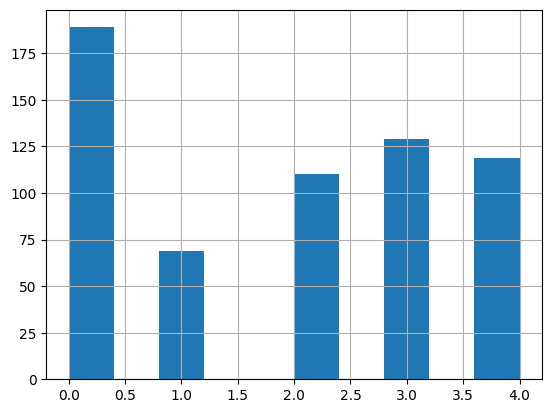

In [ ]:
app_children_df['Edad (años)'].hist()

Se observa la edad de los niños va de recién nacidos (0 años de edad) a los cuantos años de edad, el cero es un valor típico y plasmandolo en un diagrama de caja y bigotes podemos observar que la media es de 2 años. 

<AxesSubplot: xlabel='Edad (años)'>

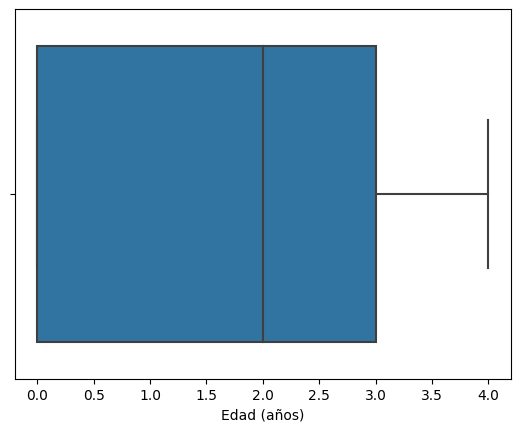

In [ ]:
sns.boxplot(data=app_children_df,x='Edad (años)')

Ahora revisemos las proporciones de los niños por género:

<AxesSubplot: xlabel='count', ylabel='Sexo'>

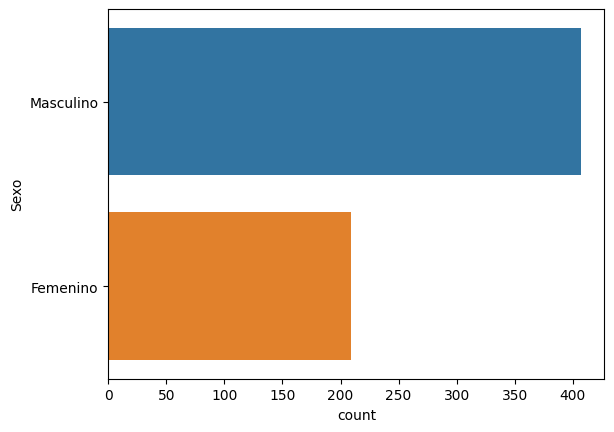

In [ ]:
sns.countplot(data=app_children_df,y='Sexo')

Se observa claramente que la población de niños varones es mayor.

<AxesSubplot: xlabel='Edad (años)', ylabel='Sexo'>

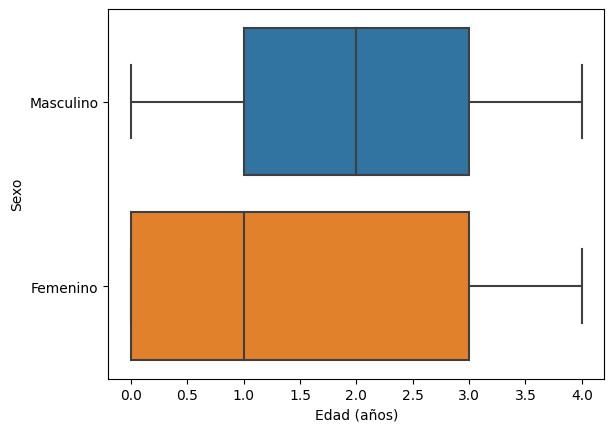

In [ ]:
sns.boxplot(data=app_children_df, x='Edad (años)', y='Sexo')

Identificar si existen padres tienen más de un hijo registrado

In [ ]:
duplicados_count = app_children_df.groupby('Padre de familia/ID').size()
duplicados_count = duplicados_count[duplicados_count > 1].sort_values(ascending=False)
duplicados_count[:10]

Padre de familia/ID
6      2
9      2
553    2
528    2
522    2
498    2
490    2
488    2
455    2
411    2
dtype: int64

In [ ]:
duplicados_count.count()

24

In [ ]:

app_parents.count()

Sexo                               601
Se rechazó                         601
Estatus                            601
Fecha de registro                  601
ID                                 601
Edad                               601
Inició el proceso de Valoración    601
dtype: int64

In [ ]:
total = app_parents.groupby('Sexo').count()['Estatus']
sm = sum(total)
for r in total:
    print((r/sm)*100)

87.85357737104825
12.146422628951747


[Text(0.5, 1.0, 'Padres de familia registrados por sexo')]

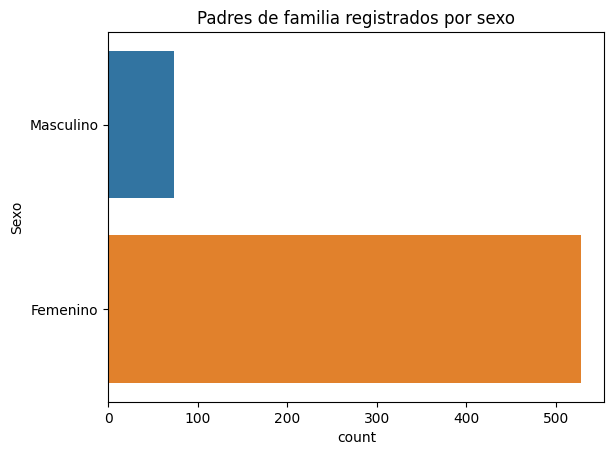

In [ ]:
sns.countplot(data=app_parents,y='Sexo').set(title='Padres de familia registrados por sexo')

<AxesSubplot: xlabel='Edad', ylabel='Count'>

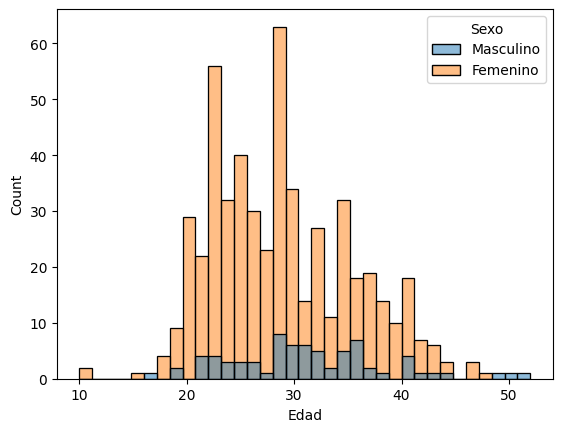

In [ ]:
sns.histplot(data=app_parents,x='Edad',hue='Sexo',bins=35)

<AxesSubplot: xlabel='Edad'>

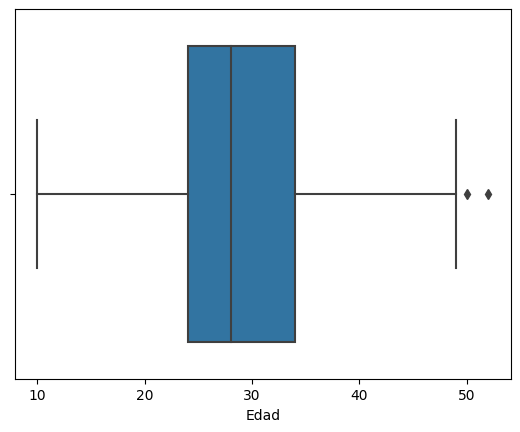

In [ ]:
sns.boxplot(data=app_parents,x='Edad')

In [ ]:
# Unir  los estatus de citado y contactado 
app_parents.loc[app_parents['Estatus']=='Citado',['Estatus']] = 'Contactado'

In [ ]:
sexo_estatus = app_parents.pivot_table(index='Estatus',columns=['Sexo'],values='ID',aggfunc='count')
sexo_estatus

Sexo,Femenino,Masculino
Estatus,,
Contactado,447,54
Falso,55,11
Nuevo,26,8


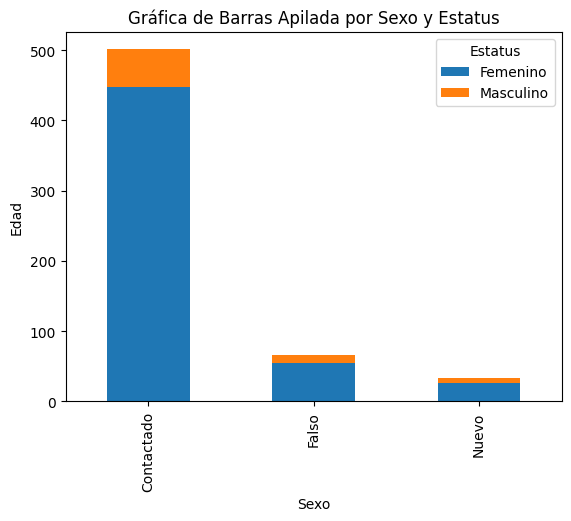

In [ ]:
sexo_estatus.plot(kind='bar', stacked=True)
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.title('Gráfica de Barras Apilada por Sexo y Estatus')
plt.legend(title='Estatus')
plt.show()

In [ ]:
sexo_estatus.count()

Sexo
Femenino     3
Masculino    3
dtype: int64

In [ ]:
app_parents =  app_parents[app_parents['Estatus']=='Contactado']

### Filtrar niños ya contactados

Se filtran a los niños los cuales sus padres ya fueron contactados y no son perfil falso.

In [ ]:
app_parents.head(5)

,Sexo,Se rechazó,Estatus,Fecha de registro,ID,Edad,Inició el proceso de Valoración
4,Femenino,False,Contactado,2019-03-29 22:19:16,12,34,True
6,Femenino,False,Contactado,2019-03-29 22:19:16,14,35,False
8,Femenino,False,Contactado,2019-04-01 17:17:57,16,21,False
9,Femenino,False,Contactado,2019-04-01 17:17:57,17,22,False
10,Femenino,False,Contactado,2019-04-01 17:17:57,18,31,False


In [ ]:
app_parents_ids = app_parents['ID']
app_children_df = app_children_df[app_children_df['Padre de familia/ID'].isin(app_parents_ids)]

In [ ]:
app_children_df.count()

Sexo                   511
Fecha de nacimiento    511
Edad (años)            511
ID                     511
Padre de familia/ID    511
dtype: int64

### Dataset del test de atención es prevención 

In [ ]:
app_children_df_ids = app_children_df['ID']
app_children_test_df =  app_children_test_df[ app_children_test_df['ID'].isin(app_children_df_ids)]

In [ ]:
app_children_test_df.count()

ID                                                                                                          511
Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).                                    511
Edad al momento de realizar el test (años)                                                                  511
Falta de coordinación entre la succión,respiracióny deglución.                                              511
La boca permanece abierta y sale saliva.                                                                    511
Le cuesta más esfuerzo realizar pequeñas acciones con las manos como insertar objetos, utilizar tijeras.    511
Le cuesta trabajo socializar y jugar con otros niños.                                                       511
Los periodos de atención son cortos y no sigue órdenes sencillas.                                           511
Manos y piernas se sienten rígidas                                                                      

In [ ]:
app_children_test_df.groupby('Prueba aplicada').count()

,ID,"Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).",Edad al momento de realizar el test (años),"Falta de coordinación entre la succión,respiracióny deglución.",La boca permanece abierta y sale saliva.,"Le cuesta más esfuerzo realizar pequeñas acciones con las manos como insertar objetos, utilizar tijeras.",Le cuesta trabajo socializar y jugar con otros niños.,Los periodos de atención son cortos y no sigue órdenes sencillas.,Manos y piernas se sienten rígidas,Meses,...,No se puede prender al pecho y/o biberón.,No tolera estar boca abajo y lo expresa mediante el llanto,Poca coordinación motora.,Poco uso de lenguaje para expresar emociones e ideas.,Presenta dificultad para controlar esfínteres,Rechaza nuevas consistencias en los alimentos.,Requiere de mucha ayuda para desvestirse.,Tarda mucho en salir de un enojo.,"Usa palabras sueltas para comunicarse, no crea oraciones.",Va de una actividad a otra sin terminarlas
Prueba aplicada,,,,,,,,,,,,,,,,,,,,,
0/3 Meses,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1er Año,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
2do Año,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
3/6 Meses,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
3er Año,114,114,114,114,114,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
4to Año,105,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,105,105,105,105
6/9 Meses,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
9/12 Meses,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18


In [ ]:
def get_records_by_prueba_aplicada(prueba_aplicada,cols):
    cols.append('ID')
    return app_children_test_df[app_children_test_df['Prueba aplicada']==prueba_aplicada][cols]

def get_corr(df,c):
    c = [_ for _ in  c if _ !='ID']
    mcr = np.corrcoef(df[c].values.T)
    sns.heatmap(mcr,annot=True,xticklabels=c,yticklabels=c)
def plots(df):
    sns.pairplot(data=df,height=1.8)

### Test para niños de 0 a 3 meses

1.	Las manos y piernas se sienten rígidas
2.	La boca permanece abierta y sale saliva
3.	No se puede prender al pecho y/o biberón
4.	Falta de coordinación entre succión, respiración y deglución
5.	No emite respuesta a estímulos externos


In [ ]:
test_0_3_meses_columnas = [
     'Manos y piernas se sienten rígidas',
     'La boca permanece abierta y sale saliva.',
     'No se puede prender al pecho y/o biberón.',
     'Falta de coordinación entre la succión,respiracióny deglución.',
     'No emite respuesta a estímulos externos (auditiva y visual)'
]
test_0_3_meses = get_records_by_prueba_aplicada(prueba_aplicada='0/3 Meses',cols=test_0_3_meses_columnas)
test_0_3_meses

,Manos y piernas se sienten rígidas,La boca permanece abierta y sale saliva.,No se puede prender al pecho y/o biberón.,"Falta de coordinación entre la succión,respiracióny deglución.",No emite respuesta a estímulos externos (auditiva y visual),ID
50,True,True,True,True,True,60
52,True,False,True,False,False,62
54,True,True,False,True,True,64
76,True,False,True,False,False,86
78,True,True,True,False,True,88
86,True,False,True,True,True,96
94,False,True,True,True,False,104
98,True,True,True,False,True,108
120,True,True,True,False,True,130
122,True,True,True,True,True,132


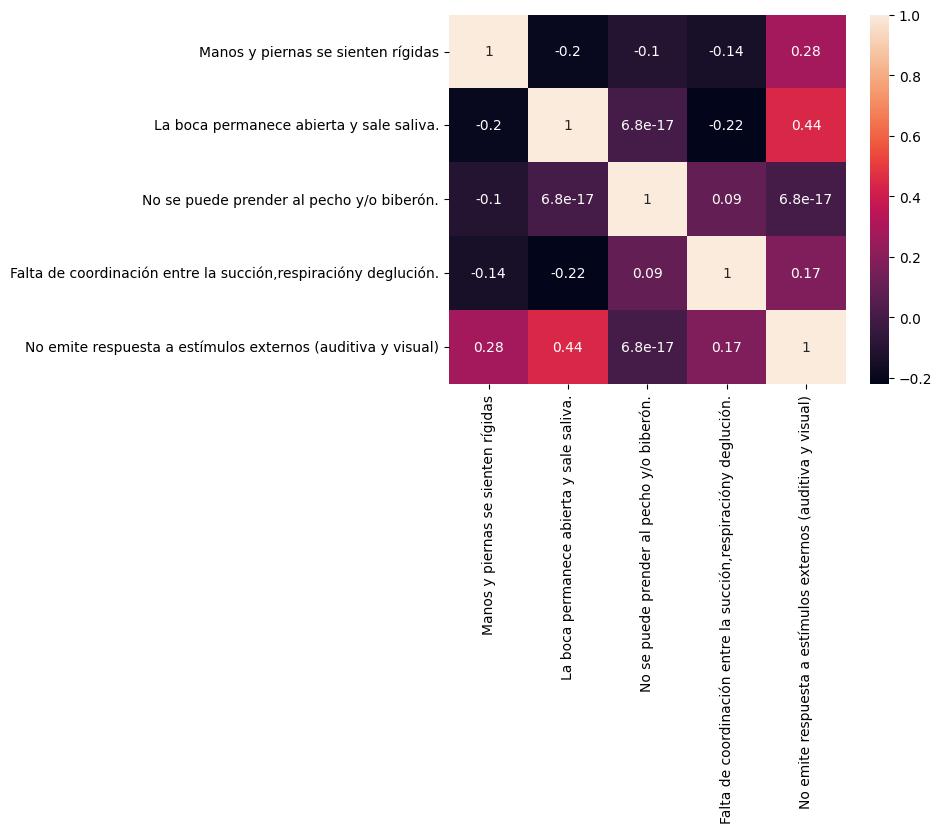

In [ ]:
get_corr(test_0_3_meses,test_0_3_meses_columnas)

### Test para niños de 3 a 6 meses

1.	Molestia en actividades como baño y cambio de ropa
2.	No explora con manos, pies o boca
3.	No logra mantenerse sentado con apoyo 
4.	No dirige la mirada a algo específico
5.	No se calma fácilmente

In [ ]:
test_0_6_meses_columnas = [
'Mucha molestia en actividades como baño y cambio de ropa.', 
'No explora con manos pies o boca.',
'No logra mantenerse sentado con apoyo.',
'No dirige la mirada a algo específico',
'No se calma fácilmente.'
]
test_0_6_meses = get_records_by_prueba_aplicada(prueba_aplicada='3/6 Meses',cols=test_0_6_meses_columnas)
test_0_6_meses

,Mucha molestia en actividades como baño y cambio de ropa.,No explora con manos pies o boca.,No logra mantenerse sentado con apoyo.,No dirige la mirada a algo específico,No se calma fácilmente.,ID
74,True,True,True,True,False,84
85,False,False,False,True,False,95
104,True,True,True,True,False,114
124,True,True,False,True,True,134
139,True,False,True,True,False,149
161,False,False,True,False,True,171
180,True,True,False,True,True,190
253,False,True,False,True,False,263
274,False,True,False,True,False,284
285,True,True,False,True,True,295


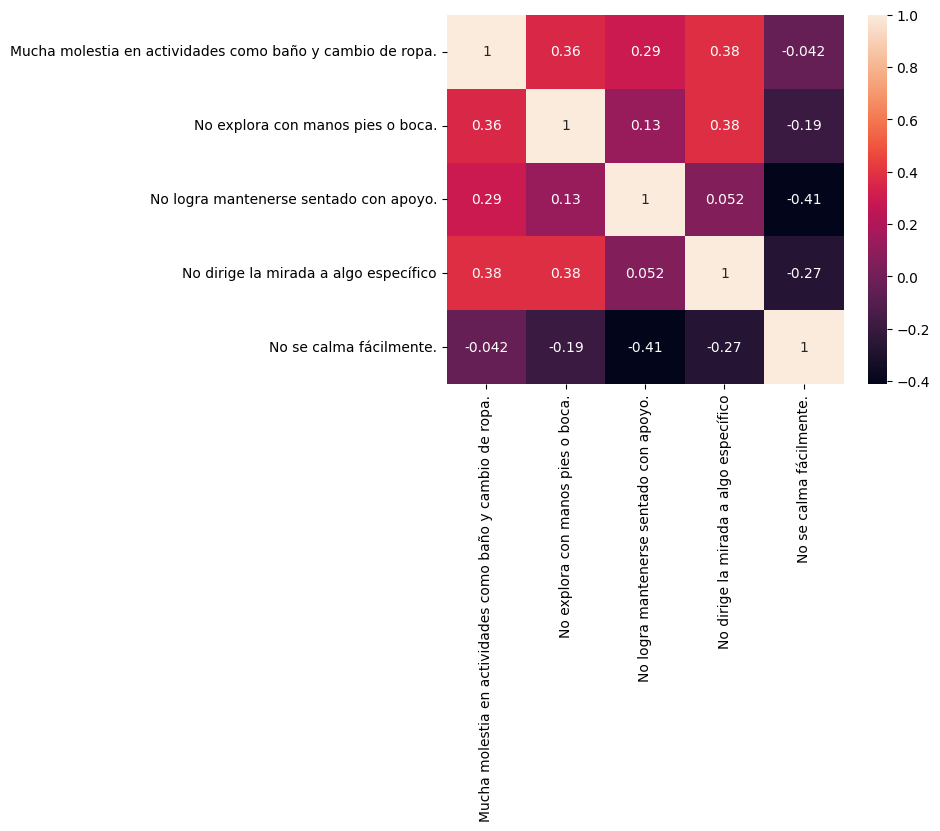

In [ ]:
get_corr(test_0_6_meses,test_0_6_meses_columnas)

In [ ]:
test_6_9_meses_columnas = [
'No se mantiene sentado y no se rota para tomarlos objetos.',
'No tolera estar boca abajo y lo expresa mediante el llanto',
'No acepta papillas.',
'No le llama la atención explorar los objetos.',
'Tarda mucho en salir de un enojo.',
]
test_6_9_meses = get_records_by_prueba_aplicada(prueba_aplicada='6/9 Meses',cols=test_6_9_meses_columnas)
test_6_9_meses

,No se mantiene sentado y no se rota para tomarlos objetos.,No tolera estar boca abajo y lo expresa mediante el llanto,No acepta papillas.,No le llama la atención explorar los objetos.,Tarda mucho en salir de un enojo.,ID
21,False,True,True,True,False,31
39,False,False,True,False,False,49
42,False,False,True,False,True,52
64,True,True,True,True,True,74
68,False,True,True,True,False,78
81,True,True,True,True,True,91
83,False,True,True,True,False,93
105,True,True,True,True,True,115
107,False,True,False,True,False,117
110,True,True,True,True,True,120


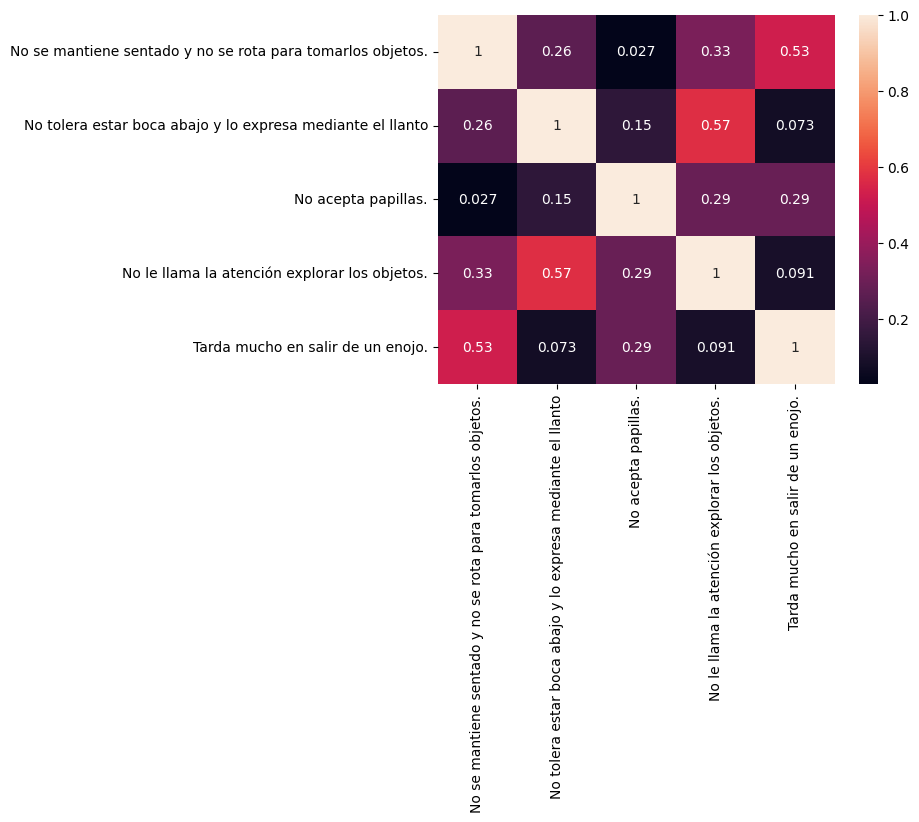

In [ ]:
get_corr(test_6_9_meses,test_6_9_meses_columnas)

### Test de 9 a 12 meses

1.	Rechaza nuevas consistencias en alimentos
2.	No se arrastra, gatea o camina
3.	No hay intención de movimiento para lograr un objetivo
4.	No balbucea
5.	No presta atención cuando se le habla

In [ ]:
test_9_12_meses_columnas = [
'Rechaza nuevas consistencias en los alimentos.',
'No se arrastra, no gatea, no camina.',
'No hay intención de movimiento para lograr un objetivo.',
'No balbucea',
'No presta atención cuando se le habla.'
]
test_9_12_meses = get_records_by_prueba_aplicada(prueba_aplicada='9/12 Meses',cols=test_9_12_meses_columnas)
test_9_12_meses

,Rechaza nuevas consistencias en los alimentos.,"No se arrastra, no gatea, no camina.",No hay intención de movimiento para lograr un objetivo.,No balbucea,No presta atención cuando se le habla.,ID
29,False,True,False,True,False,39
66,True,False,False,True,True,76
119,True,False,True,True,True,129
140,False,False,False,True,False,150
158,True,False,True,True,True,168
174,True,False,True,True,True,184
217,True,False,True,False,True,227
239,True,False,True,True,True,249
248,True,True,True,True,False,258
249,True,False,True,True,True,259


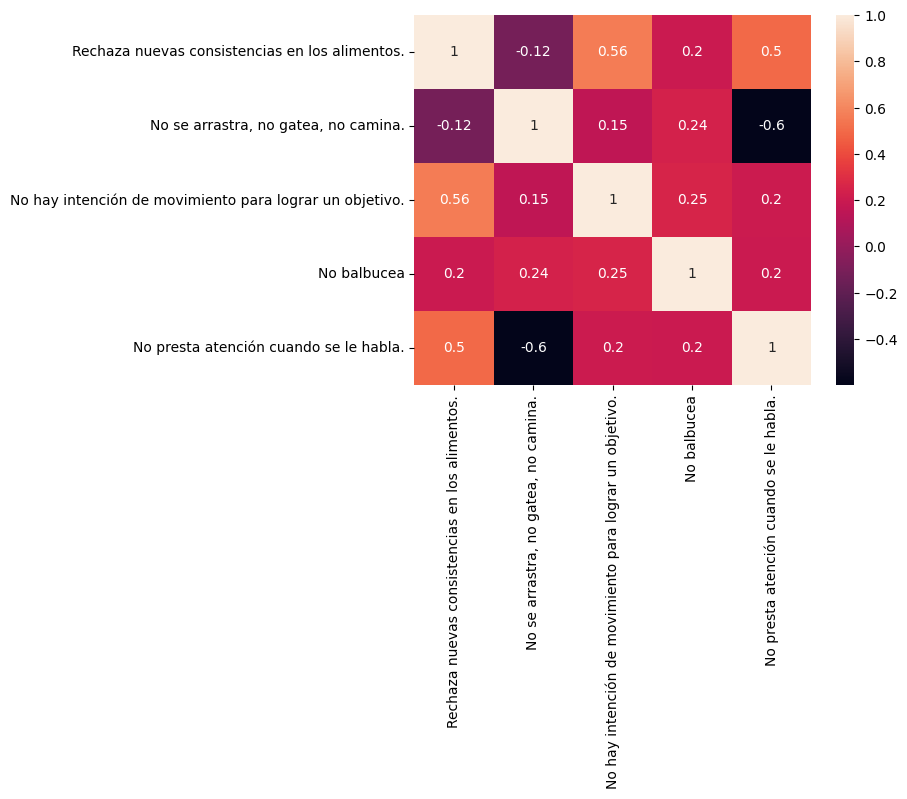

In [ ]:
get_corr(test_9_12_meses,test_9_12_meses_columnas)

### Test de 1er año 

1.	No camina, trepa o se hinca
2.	No bebe de una taza ni intenta tomar la cuchara
3.	Los periodos de atención son cortos y no sigue órdenes sencillas
4.	No existe interés para interactuar con los demás
5.	No juega ni explora con juguetes

In [ ]:
test_1er_anio_columnas = [
'No camina, no trepa, no se hinca.',
'No bebe de una taza y no intenta tomar la cuchara.',
'Los periodos de atención son cortos y no sigue órdenes sencillas.',
'No existe interés por interactuar con los demás.',
'No explora juguetes ni juega con ellos',
]
test_1er_anio=  get_records_by_prueba_aplicada(prueba_aplicada='1er Año',cols=test_1er_anio_columnas)
test_1er_anio

,"No camina, no trepa, no se hinca.",No bebe de una taza y no intenta tomar la cuchara.,Los periodos de atención son cortos y no sigue órdenes sencillas.,No existe interés por interactuar con los demás.,No explora juguetes ni juega con ellos,ID
27,False,False,False,False,False,37
32,False,False,True,False,False,42
33,True,True,False,False,True,43
41,False,False,False,False,False,51
44,False,False,False,True,True,54
48,False,False,False,True,False,58
59,True,True,False,False,True,69
60,True,False,False,True,True,70
84,False,True,False,True,True,94
100,True,False,False,True,True,110


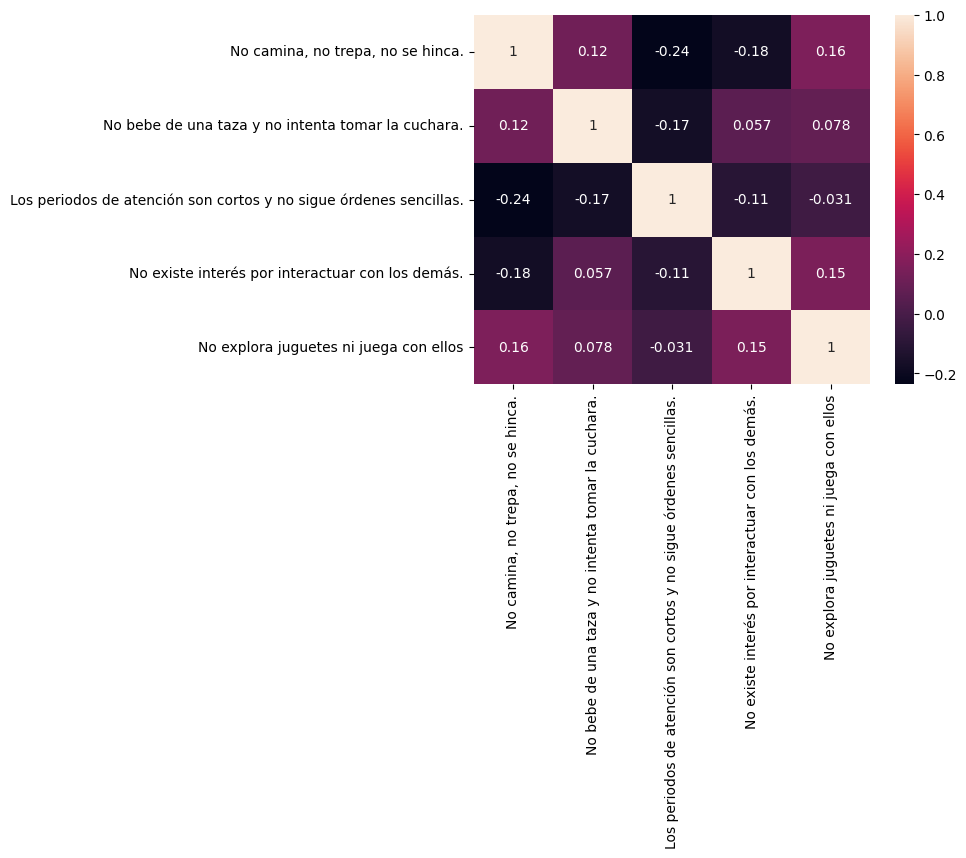

In [ ]:
get_corr(test_1er_anio,test_1er_anio)

### Test de dos años de edad

1.	No patea una pelota ni sube o baja escaleras
2.	No come con cuchara, no se quita suéteres abiertos, ni se baja los pantalones
3.	No comunica ideas ni formula preguntas
4.	No le gusta explorar cosas nuevas
5.	No identifica partes del cuerpo


In [ ]:
test_2do_anio_columnas = [
'No patea una pelota, no sube ni baja escaleras.',
'No come con cuchara, no se quita suéteres abiertos ni se baja los pantalones',
'No comunica ideas ni formula preguntas.',
'No le gusta explorar cosas nuevas.',
'No identifica partes del cuerpo.'
]
test_2do_anio=  get_records_by_prueba_aplicada(prueba_aplicada='2do Año',cols=test_2do_anio_columnas)
test_2do_anio

,"No patea una pelota, no sube ni baja escaleras.","No come con cuchara, no se quita suéteres abiertos ni se baja los pantalones",No comunica ideas ni formula preguntas.,No le gusta explorar cosas nuevas.,No identifica partes del cuerpo.,ID
4,False,False,False,True,False,14
20,False,True,False,True,False,30
22,False,False,False,True,False,32
25,False,False,False,True,False,35
43,True,False,False,True,False,53
...,...,...,...,...,...,...
559,False,False,False,True,True,569
565,False,False,False,True,True,575
580,True,True,False,True,False,590
587,False,False,False,True,False,597


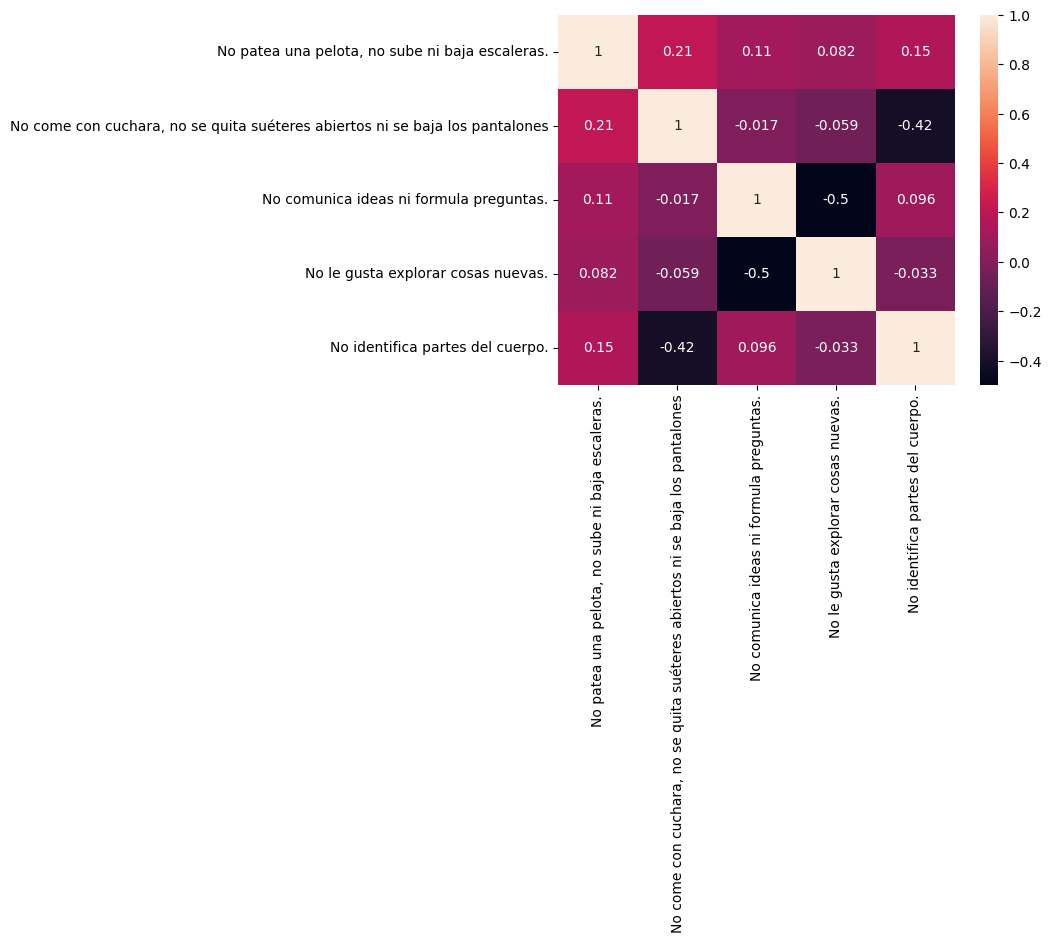

In [ ]:
get_corr(test_2do_anio,test_2do_anio_columnas)

### Test 3 años de edad 

1.	No alterna los pies al subir o bajar escaleras
2.	Dificultad al realizar acciones con las manos como insertar objetos o utilizar tijeras
3.	No cierra bien los labios y derrama líquidos 
4.	No crea oraciones, usa palabras sueltas para comunicarse
5.	No respeta límites establecidos por adultos
6.	Dificultad para socializar y jugar con otros niños


In [ ]:
test_3er_anio_columnas = [
'No alterna los pies al subir o bajar escaleras.',
'Le cuesta más esfuerzo realizar pequeñas acciones con las manos como insertar objetos, utilizar tijeras.',
'No cierra bien los labios y derrama líquidos.',
'Usa palabras sueltas para comunicarse, no crea oraciones.',
'No respeta límites establecidos por adultos.',
'Le cuesta trabajo socializar y jugar con otros niños.'
]
test_3er_anio=  get_records_by_prueba_aplicada(prueba_aplicada='3er Año',cols=test_3er_anio_columnas)
test_3er_anio

,No alterna los pies al subir o bajar escaleras.,"Le cuesta más esfuerzo realizar pequeñas acciones con las manos como insertar objetos, utilizar tijeras.",No cierra bien los labios y derrama líquidos.,"Usa palabras sueltas para comunicarse, no crea oraciones.",No respeta límites establecidos por adultos.,Le cuesta trabajo socializar y jugar con otros niños.,ID
9,False,False,True,True,False,False,19
13,True,False,True,False,False,False,23
31,True,True,True,True,False,False,41
35,True,True,True,False,False,True,45
51,True,True,True,False,False,True,61
...,...,...,...,...,...,...,...
567,False,True,False,False,False,True,577
582,True,True,True,False,True,True,592
583,True,True,True,True,False,False,593
590,False,True,False,False,True,False,600


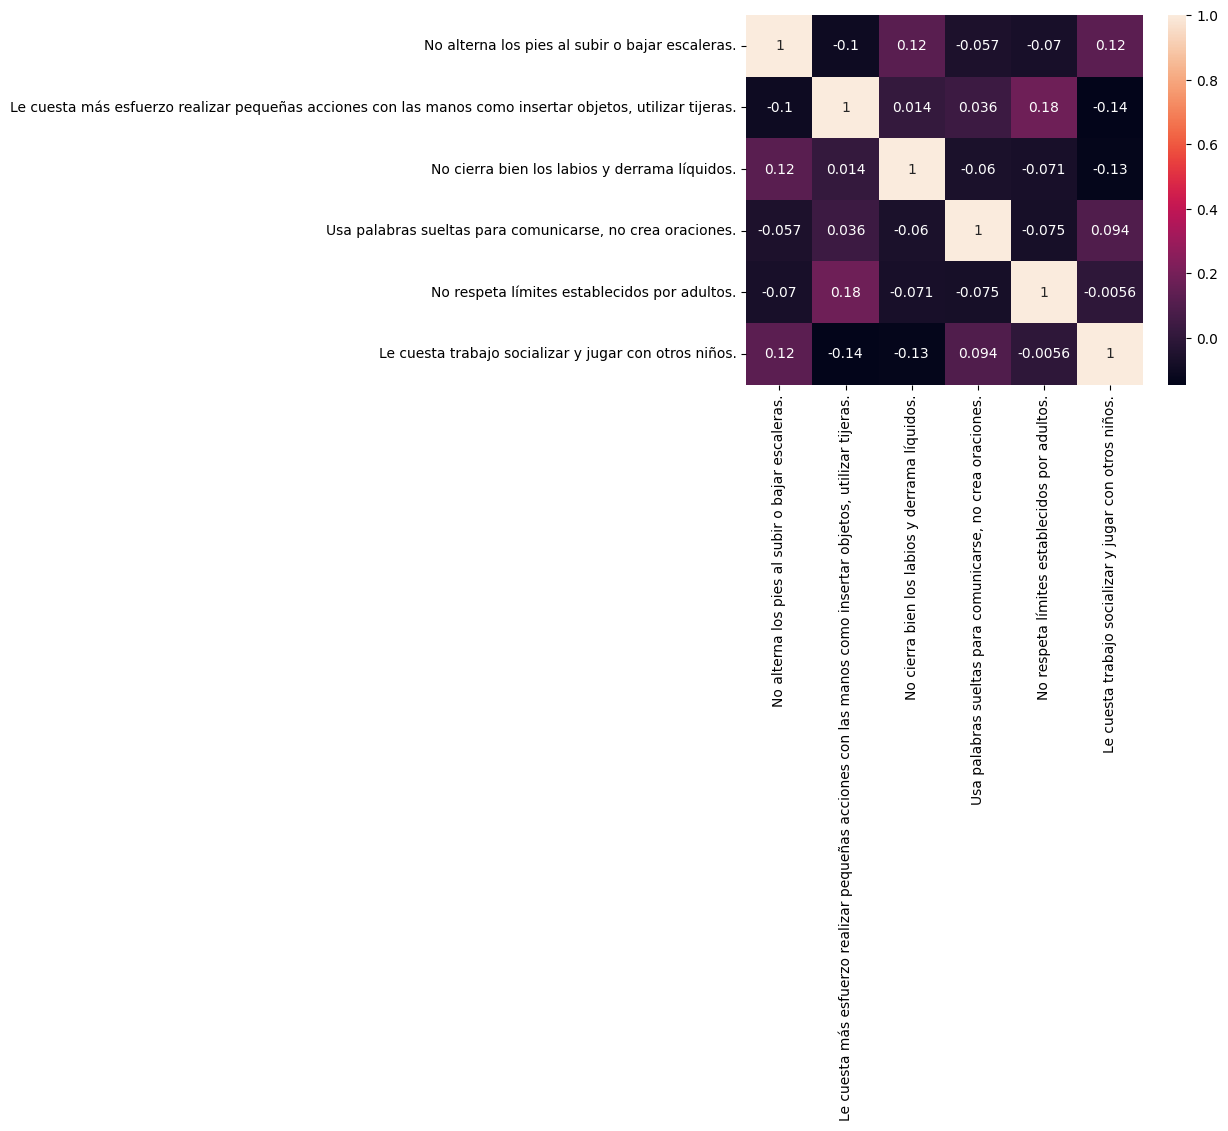

In [ ]:
get_corr(test_3er_anio,test_3er_anio_columnas)

### Test 4 años de edad

1.	Dificultad para ubicarse espacialmente
2.	Requiere mucha ayuda para desvestirse
3.	Poco uso del lenguaje para expresar emociones e ideas
4.	Pasa de una actividad a otra sin terminarlas
5.	Poca coordinación motora
6.	Dificultades para controlar esfínteres

In [ ]:
test_4to_anio_columnas = [
'Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).',
'Requiere de mucha ayuda para desvestirse.',
'Poco uso de lenguaje para expresar emociones e ideas.',
'Poca coordinación motora.',
'Presenta dificultad para controlar esfínteres',
'Va de una actividad a otra sin terminarlas',
]
test_4to_anio=  get_records_by_prueba_aplicada(prueba_aplicada='4to Año',cols=test_4to_anio_columnas)
test_4to_anio



,"Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).",Requiere de mucha ayuda para desvestirse.,Poco uso de lenguaje para expresar emociones e ideas.,Poca coordinación motora.,Presenta dificultad para controlar esfínteres,Va de una actividad a otra sin terminarlas,ID
6,True,False,False,True,True,False,16
8,True,True,False,True,True,True,18
10,False,True,False,True,False,True,20
24,False,True,False,False,False,False,34
26,True,False,True,False,True,False,36
...,...,...,...,...,...,...,...
548,True,False,False,True,False,True,558
556,False,True,False,False,True,True,566
592,True,True,True,True,True,True,602
593,True,True,True,False,True,True,603


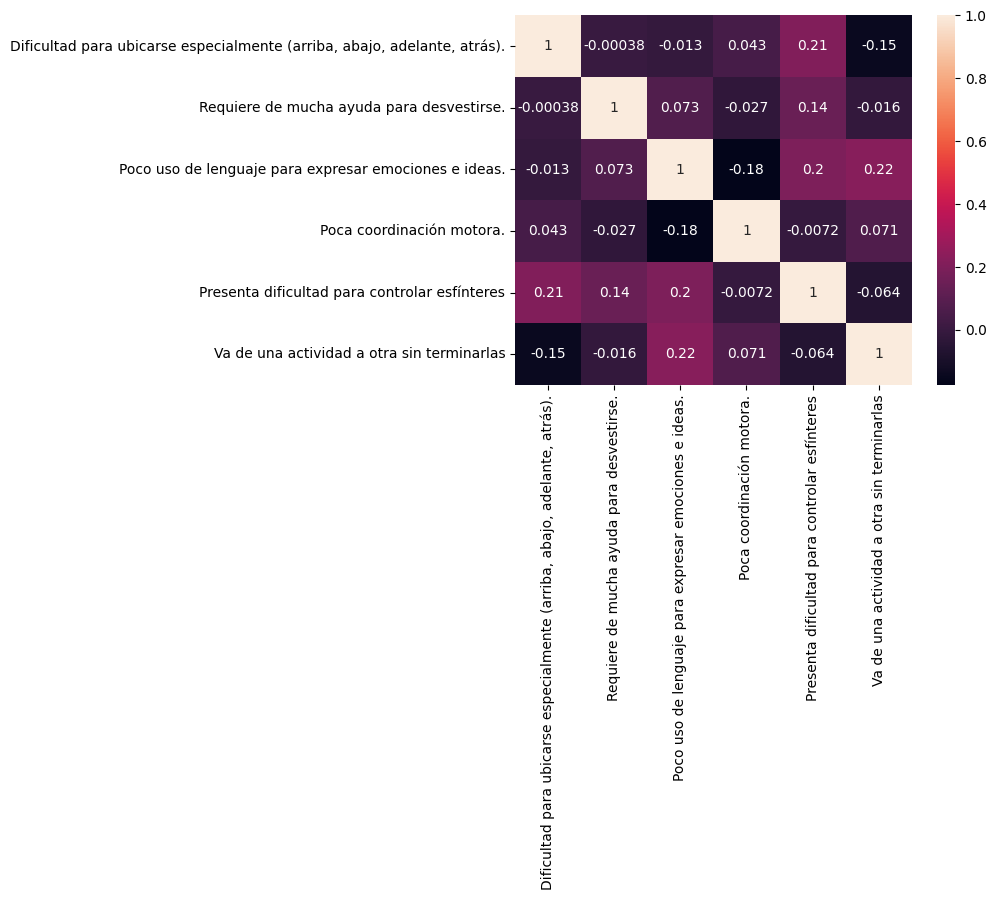

In [ ]:
get_corr(test_4to_anio,test_4to_anio_columnas)

### Factores riesgo 

A continuación se muestra el análisis exploratorio de datos sobre el dataset de  factores de riesgo de los infantes registrados en atención es prevención. 

In [ ]:
# app_children_factor_df[app_children_factor_df['Factores de riesgos/Tipo de factor de riesgo']=='postnales'] = 'postnatales'

app_children_factor_df.loc[app_children_factor_df['Factores de riesgos/Tipo de factor de riesgo'] == 'postnales', 'Factores de riesgos/Tipo de factor de riesgo'] = 'postnatales'

In [ ]:
app_children_factor_df.count()

ID                                                       1143
Factores de riesgos/Tipo de factor de riesgo             1143
Factores de riesgos/Presenta el factor de riesgo         1143
Factores de riesgos/Factor de riesgo/ID                  1143
Factores de riesgos/Factor de riesgo/Factor de riesgo    1143
dtype: int64

<AxesSubplot: xlabel='count', ylabel='Factores de riesgos/Tipo de factor de riesgo'>

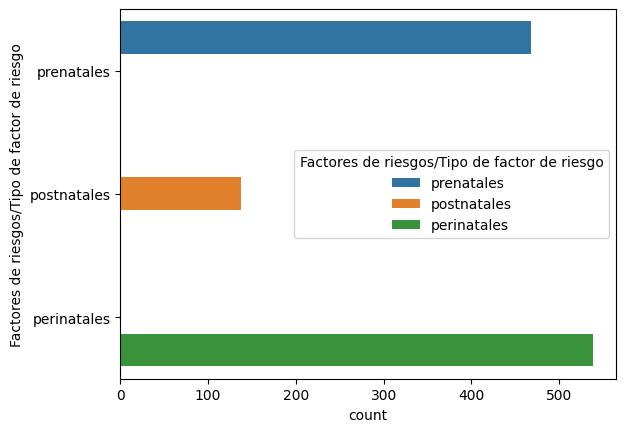

In [ ]:
sns.countplot(data=app_children_factor_df,hue='Factores de riesgos/Tipo de factor de riesgo' , y='Factores de riesgos/Tipo de factor de riesgo')

In [ ]:
app_factores_count = app_children_factor_df.groupby("ID").count()
app_factores_count

,Factores de riesgos/Tipo de factor de riesgo,Factores de riesgos/Presenta el factor de riesgo,Factores de riesgos/Factor de riesgo/ID,Factores de riesgos/Factor de riesgo/Factor de riesgo
ID,,,,
8.0,6,6,6,6
9.0,10,10,10,10
10.0,1,1,1,1
11.0,1,1,1,1
14.0,4,4,4,4
...,...,...,...,...
621.0,2,2,2,2
622.0,2,2,2,2
623.0,2,2,2,2


In [ ]:
app_factores_count[app_factores_count['Factores de riesgos/Tipo de factor de riesgo']>100]

,Factores de riesgos/Tipo de factor de riesgo,Factores de riesgos/Presenta el factor de riesgo,Factores de riesgos/Factor de riesgo/ID,Factores de riesgos/Factor de riesgo/Factor de riesgo
ID,,,,


<AxesSubplot: xlabel='Factores de riesgos/Tipo de factor de riesgo'>

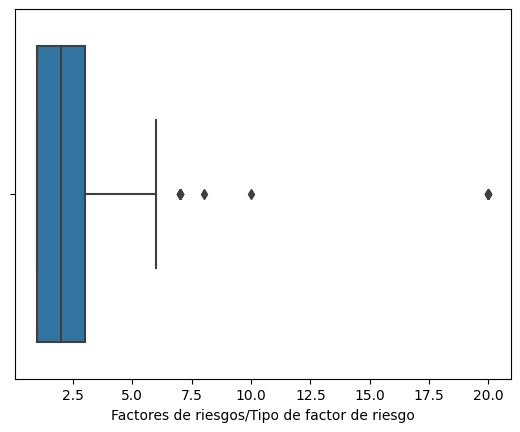

In [ ]:
sns.boxplot(
     data=app_factores_count,x='Factores de riesgos/Tipo de factor de riesgo'
    )

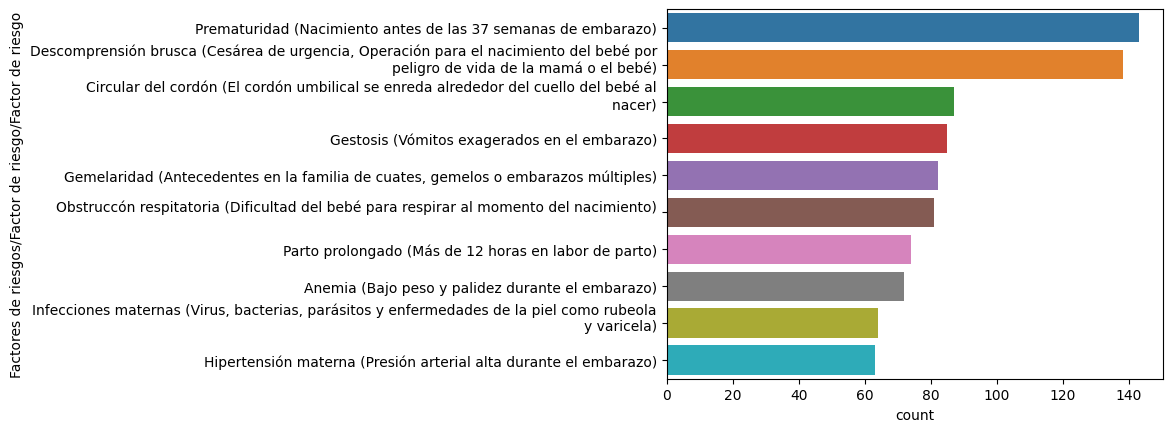

In [ ]:
# identificar los factores de riesgo más comunes en el dataset 
my_plot = sns.countplot(
    data=app_children_factor_df,
    y='Factores de riesgos/Factor de riesgo/Factor de riesgo',
     order = app_children_factor_df['Factores de riesgos/Factor de riesgo/Factor de riesgo'].value_counts().iloc[:10].index
)
# my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

In [ ]:
app_children_df.rename(columns={'ID':'Child ID'},inplace=True)


In [ ]:
app_children_df.columns

Index(['Sexo', 'Fecha de nacimiento', 'Edad (años)', 'Child ID',
       'Padre de familia/ID'],
      dtype='object')

In [ ]:
df_parents_and_childrens = pd.merge(
    app_parents,
    app_children_df,left_on='ID',
    right_on='Padre de familia/ID',how='inner',
    suffixes=('_parent','_child')
    )


In [ ]:
df_parents_and_childrens.head(10)

,Sexo_parent,Se rechazó,Estatus,Fecha de registro,ID,Edad,Inició el proceso de Valoración,Sexo_child,Fecha de nacimiento,Edad (años),Child ID,Padre de familia/ID
0,Femenino,False,Contactado,2019-03-29 22:19:16,12,34,True,Masculino,2016-12-03,2,14,12
1,Femenino,False,Contactado,2019-03-29 22:19:16,14,35,False,Masculino,2014-06-27,4,16,14
2,Femenino,False,Contactado,2019-04-01 17:17:57,16,21,False,Masculino,2014-04-19,4,18,16
3,Femenino,False,Contactado,2019-04-01 17:17:57,17,22,False,Masculino,2015-06-08,3,19,17
4,Femenino,False,Contactado,2019-04-01 17:17:57,18,31,False,Masculino,2014-12-20,4,20,18
5,Femenino,False,Contactado,2019-04-04 15:57:28,21,28,False,Masculino,2017-01-13,2,23,21
6,Femenino,False,Contactado,2019-04-23 18:47:05,27,26,False,Masculino,2017-01-25,2,30,27
7,Femenino,False,Contactado,2019-04-23 18:47:05,28,35,False,Masculino,2018-09-28,0,31,28
8,Femenino,False,Contactado,2019-04-23 18:47:05,29,33,False,Masculino,2016-07-15,2,32,29
9,Femenino,False,Contactado,2019-04-23 18:47:05,30,36,False,Masculino,2014-10-22,4,34,30


In [ ]:
app_children_test_df.columns

Index(['ID',
       'Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).',
       'Edad al momento de realizar el test (años)',
       'Falta de coordinación entre la succión,respiracióny deglución.',
       'La boca permanece abierta y sale saliva.',
       'Le cuesta más esfuerzo realizar pequeñas acciones con las manos como insertar objetos, utilizar tijeras.',
       'Le cuesta trabajo socializar y jugar con otros niños.',
       'Los periodos de atención son cortos y no sigue órdenes sencillas.',
       'Manos y piernas se sienten rígidas', 'Meses',
       'Mucha molestia en actividades como baño y cambio de ropa.',
       'No acepta papillas.',
       'No alterna los pies al subir o bajar escaleras.', 'No balbucea',
       'No bebe de una taza y no intenta tomar la cuchara.',
       'No camina, no trepa, no se hinca.',
       'No cierra bien los labios y derrama líquidos.',
       'No come con cuchara, no se quita suéteres abiertos ni se baja los pantalones',

In [ ]:
conteo = app_children_test_df['ID'].value_counts()
conteo[conteo>1]

Series([], Name: ID, dtype: int64)

In [ ]:
df_parents_and_childrens_and_test = pd.merge(
    df_parents_and_childrens,
    app_children_test_df,
    left_on='Child ID',
    right_on='ID',
    how='inner'
)

In [ ]:
df_parents_and_childrens_and_test.head(10)

,Sexo_parent,Se rechazó,Estatus,Fecha de registro,ID_x,Edad,Inició el proceso de Valoración,Sexo_child,Fecha de nacimiento,Edad (años),...,No tolera estar boca abajo y lo expresa mediante el llanto,Poca coordinación motora.,Poco uso de lenguaje para expresar emociones e ideas.,Presenta dificultad para controlar esfínteres,Prueba aplicada,Rechaza nuevas consistencias en los alimentos.,Requiere de mucha ayuda para desvestirse.,Tarda mucho en salir de un enojo.,"Usa palabras sueltas para comunicarse, no crea oraciones.",Va de una actividad a otra sin terminarlas
0,Femenino,False,Contactado,2019-03-29 22:19:16,12,34,True,Masculino,2016-12-03,2,...,False,False,False,False,2do Año,False,False,False,False,False
1,Femenino,False,Contactado,2019-03-29 22:19:16,14,35,False,Masculino,2014-06-27,4,...,False,True,False,True,4to Año,False,False,False,False,False
2,Femenino,False,Contactado,2019-04-01 17:17:57,16,21,False,Masculino,2014-04-19,4,...,False,True,False,True,4to Año,False,True,False,False,True
3,Femenino,False,Contactado,2019-04-01 17:17:57,17,22,False,Masculino,2015-06-08,3,...,False,False,False,False,3er Año,False,False,False,True,False
4,Femenino,False,Contactado,2019-04-01 17:17:57,18,31,False,Masculino,2014-12-20,4,...,False,True,False,False,4to Año,False,True,False,False,True
5,Femenino,False,Contactado,2019-04-04 15:57:28,21,28,False,Masculino,2017-01-13,2,...,False,False,False,False,3er Año,False,False,False,False,False
6,Femenino,False,Contactado,2019-04-23 18:47:05,27,26,False,Masculino,2017-01-25,2,...,False,False,False,False,2do Año,False,False,False,False,False
7,Femenino,False,Contactado,2019-04-23 18:47:05,28,35,False,Masculino,2018-09-28,0,...,True,False,False,False,6/9 Meses,False,False,False,False,False
8,Femenino,False,Contactado,2019-04-23 18:47:05,29,33,False,Masculino,2016-07-15,2,...,False,False,False,False,2do Año,False,False,False,False,False
9,Femenino,False,Contactado,2019-04-23 18:47:05,30,36,False,Masculino,2014-10-22,4,...,False,False,False,False,4to Año,False,True,False,False,False


In [ ]:
df_parents_and_childrens_and_test.shape

(511, 58)

In [ ]:
app_children_factor_df.head(10)

,ID,Factores de riesgos/Tipo de factor de riesgo,Factores de riesgos/Presenta el factor de riesgo,Factores de riesgos/Factor de riesgo/ID,Factores de riesgos/Factor de riesgo/Factor de riesgo
0,8.0,prenatales,True,1.0,"Infecciones maternas (Virus, bacterias, parási..."
1,8.0,postnatales,True,20.0,Tumores (Presencia de “abultamientos” en algun...
2,8.0,postnatales,True,19.0,Deshidratación (Falta de líquidos por vómito o...
3,8.0,postnatales,True,18.0,"Convulsiones (Movimientos involuntarios tipo ""..."
4,8.0,postnatales,True,16.0,"Traumatismos (Lesión, principalmente en la cab..."
5,8.0,postnatales,True,17.0,Encefalitis (Inflamación o infección en el cer...
6,9.0,prenatales,True,1.0,"Infecciones maternas (Virus, bacterias, parási..."
7,9.0,prenatales,True,3.0,Gestosis (Vómitos exagerados en el embarazo)
8,9.0,prenatales,True,4.0,Radiaciones (Se realizaron estudios de Rayos X...
9,9.0,prenatales,True,6.0,Hipertensión materna (Presión arterial alta du...


In [ ]:
app_children_factor_df['Factores de riesgos/Factor de riesgo/Factor de riesgo'].str.get_dummies(',')

,Operación para el nacimiento del bebé por\n peligro de vida de la mamá o el bebé)\n,bacterias,gemelos o embarazos múltiples),o alguna parte del\n cuerpo)\n,ojos,parásitos y enfermedades de la piel como rubeola\n y varicela)\n,principalmente en la cabeza),Anemia (Bajo peso y palidez durante el embarazo),Cardiopatías (Enfermedades del corazón),Circular del cordón (El cordón umbilical se enreda alrededor del cuello del bebé al\n nacer)\n,...,Gestosis (Vómitos exagerados en el embarazo),Hipertensión materna (Presión arterial alta durante el embarazo),Hipotensión (Presión arterial baja durante el embarazo),Infecciones maternas (Virus,Obstruccón respitatoria (Dificultad del bebé para respirar al momento del nacimiento)\n,Parto prolongado (Más de 12 horas en labor de parto),Prematuridad (Nacimiento antes de las 37 semanas de embarazo),Radiaciones (Se realizaron estudios de Rayos X durante el embarazo),Traumatismos (Lesión,Tumores (Presencia de “abultamientos” en alguna parte del cuerpo)
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1311,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1312,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_fatores = pd.pivot_table(app_children_factor_df,index='ID',columns=['Factores de riesgos/Factor de riesgo/Factor de riesgo'],aggfunc='count')

In [ ]:
df_fatores.head(10)

Factores de riesgos/Factor de riesgo/ID  \
Factores de riesgos/Factor de riesgo/Factor de riesgo Anemia (Bajo peso y palidez durante el embarazo)   
ID                                                                                                       
8.0                                                                                                NaN   
9.0                                                                                                NaN   
10.0                                                                                               NaN   
11.0                                                                                               NaN   
14.0                                                                                               1.0   
15.0                                                                                               NaN   
18.0                                                                                               NaN   
19.0                                                                                               1.0   
20.0                                                                                               NaN   
21.0                                                                                               NaN   

                                                                                               \
Factores de riesgos/Factor de riesgo/Factor de riesgo Cardiopatías (Enfermedades del corazón)   
ID                                                                                              
8.0                                                                                       NaN   
9.0                                                                                       1.0   
10.0                                                                                      NaN   
11.0                                                                                      NaN   
14.0                                                                                      NaN   
15.0                                                                                      NaN   
18.0                                                                                      NaN   
19.0                                                                                      NaN   
20.0                                                                                      NaN   
21.0                                                                                      NaN   

                                                                                                                                                                                 \
Factores de riesgos/Factor de riesgo/Factor de riesgo Circular del cordón (El cordón umbilical se enreda alrededor del cuello del bebé al\n                nacer)\n               
ID                                                                                                                                                                                
8.0                                                                                                  NaN                                                                          
9.0                                                                                                  NaN                                                                          
10.0                                                                                                 NaN                                                                          
11.0                                                                                                 NaN                                                                          
14.0                                                                                                 NaN                                                                 

In [ ]:
df_fatores.to_csv('f.csv')

In [ ]:
app_children_factor_df[app_children_factor_df['ID']==66]

,ID,Factores de riesgos/Tipo de factor de riesgo,Factores de riesgos/Presenta el factor de riesgo,Factores de riesgos/Factor de riesgo/ID,Factores de riesgos/Factor de riesgo/Factor de riesgo
157,66.0,prenatales,True,1.0,"Infecciones maternas (Virus, bacterias, parási..."
158,66.0,prenatales,True,2.0,Diabetes (Azúcar alta en la sangre)
159,66.0,prenatales,True,3.0,Gestosis (Vómitos exagerados en el embarazo)
160,66.0,prenatales,True,4.0,Radiaciones (Se realizaron estudios de Rayos X...
161,66.0,prenatales,True,5.0,Gemelaridad (Antecedentes en la familia de cua...
162,66.0,prenatales,True,6.0,Hipertensión materna (Presión arterial alta du...
163,66.0,prenatales,True,7.0,Anemia (Bajo peso y palidez durante el embarazo)
164,66.0,prenatales,True,8.0,Hipotensión (Presión arterial baja durante el ...
165,66.0,prenatales,True,9.0,Cardiopatías (Enfermedades del corazón)
166,66.0,perinatales,True,10.0,Prematuridad (Nacimiento antes de las 37 seman...


In [ ]:
df_factores_pp = pd.read_csv('factores_post_processing.csv')

In [ ]:
df_factores_pp.head(10)

,ID,Anemia (Bajo peso y palidez durante el embarazo),Cardiopatías (Enfermedades del corazón),Circular del cordón (El cordón umbilical se enreda alrededor del cuello del bebé al\n nacer)\n,"Convulsiones (Movimientos involuntarios tipo ""crisis"" de boca, ojos, o alguna parte del\n cuerpo)\n","Descomprensión brusca (Cesárea de urgencia, Operación para el nacimiento del bebé por\n peligro de vida de la mamá o el bebé)\n",Deshidratación (Falta de líquidos por vómito o diarrea),Diabetes (Azúcar alta en la sangre),Distocias (La salida del bebé se dificulta debido a hombros o cabeza “muy grandes”)\n,Encefalitis (Inflamación o infección en el cerebro),...,Gestosis (Vómitos exagerados en el embarazo).2,Hipertensión materna (Presión arterial alta durante el embarazo).2,Hipotensión (Presión arterial baja durante el embarazo).2,"Infecciones maternas (Virus, bacterias, parásitos y enfermedades de la piel como rubeola\n y varicela)\n .2",Obstruccón respitatoria (Dificultad del bebé para respirar al momento del nacimiento)\n .2,Parto prolongado (Más de 12 horas en labor de parto).2,Prematuridad (Nacimiento antes de las 37 semanas de embarazo).2,Radiaciones (Se realizaron estudios de Rayos X durante el embarazo).2,"Traumatismos (Lesión, principalmente en la cabeza).2",Tumores (Presencia de “abultamientos” en alguna parte del cuerpo).2
0,8,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0
1,9,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,...,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN
2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN
5,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
6,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
7,19,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_factores_pp.fillna(value=0,inplace=True)

In [ ]:
df_factores_pp.head(10)

,ID,Anemia (Bajo peso y palidez durante el embarazo),Cardiopatías (Enfermedades del corazón),Circular del cordón (El cordón umbilical se enreda alrededor del cuello del bebé al\n nacer)\n,"Convulsiones (Movimientos involuntarios tipo ""crisis"" de boca, ojos, o alguna parte del\n cuerpo)\n","Descomprensión brusca (Cesárea de urgencia, Operación para el nacimiento del bebé por\n peligro de vida de la mamá o el bebé)\n",Deshidratación (Falta de líquidos por vómito o diarrea),Diabetes (Azúcar alta en la sangre),Distocias (La salida del bebé se dificulta debido a hombros o cabeza “muy grandes”)\n,Encefalitis (Inflamación o infección en el cerebro),...,Gestosis (Vómitos exagerados en el embarazo).2,Hipertensión materna (Presión arterial alta durante el embarazo).2,Hipotensión (Presión arterial baja durante el embarazo).2,"Infecciones maternas (Virus, bacterias, parásitos y enfermedades de la piel como rubeola\n y varicela)\n .2",Obstruccón respitatoria (Dificultad del bebé para respirar al momento del nacimiento)\n .2,Parto prolongado (Más de 12 horas en labor de parto).2,Prematuridad (Nacimiento antes de las 37 semanas de embarazo).2,Radiaciones (Se realizaron estudios de Rayos X durante el embarazo).2,"Traumatismos (Lesión, principalmente en la cabeza).2",Tumores (Presencia de “abultamientos” en alguna parte del cuerpo).2
0,8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,19,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_parents_and_childrens_and_test_and_factor = pd.merge(
    df_parents_and_childrens_and_test,
    df_factores_pp,
    left_on='Child ID',
    right_on='ID',
    how='left'
)

In [ ]:
df_parents_and_childrens_and_test_and_factor

,Sexo_parent,Se rechazó,Estatus,Fecha de registro,ID_x,Edad,Inició el proceso de Valoración,Sexo_child,Fecha de nacimiento,Edad (años),...,Gestosis (Vómitos exagerados en el embarazo).2,Hipertensión materna (Presión arterial alta durante el embarazo).2,Hipotensión (Presión arterial baja durante el embarazo).2,"Infecciones maternas (Virus, bacterias, parásitos y enfermedades de la piel como rubeola\n y varicela)\n .2",Obstruccón respitatoria (Dificultad del bebé para respirar al momento del nacimiento)\n .2,Parto prolongado (Más de 12 horas en labor de parto).2,Prematuridad (Nacimiento antes de las 37 semanas de embarazo).2,Radiaciones (Se realizaron estudios de Rayos X durante el embarazo).2,"Traumatismos (Lesión, principalmente en la cabeza).2",Tumores (Presencia de “abultamientos” en alguna parte del cuerpo).2
0,Femenino,False,Contactado,2019-03-29 22:19:16,12,34,True,Masculino,2016-12-03,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,Femenino,False,Contactado,2019-03-29 22:19:16,14,35,False,Masculino,2014-06-27,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Femenino,False,Contactado,2019-04-01 17:17:57,16,21,False,Masculino,2014-04-19,4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Femenino,False,Contactado,2019-04-01 17:17:57,17,22,False,Masculino,2015-06-08,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Femenino,False,Contactado,2019-04-01 17:17:57,18,31,False,Masculino,2014-12-20,4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,Femenino,False,Contactado,2020-08-17 06:58:51,586,23,False,Femenino,2016-08-06,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
507,Femenino,False,Contactado,2020-08-17 06:58:51,586,23,False,Masculino,2016-09-06,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
508,Femenino,False,Contactado,2020-10-09 19:03:43,587,32,False,Femenino,2020-06-25,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
509,Femenino,False,Contactado,2020-11-23 06:52:14,588,21,False,Femenino,2017-05-24,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_parents_and_childrens_and_test_and_factor.shape

(511, 119)

In [ ]:
df_parents_and_childrens_and_test_and_factor.fillna(value=0,inplace=True)

In [ ]:
to_drop_cols = [
     'Se rechazó', 
     'Estatus',
     'Fecha de registro',
     'ID_x',
     'Fecha de nacimiento',
     'Child ID', 'Padre de familia/ID',
     #'Inició el proceso de Valoración',
     'ID_y',
     'ID',

]

In [ ]:
c = [ x for x in df_parents_and_childrens_and_test_and_factor.columns if x[-1].isdigit()  ]

In [ ]:
c

['Anemia (Bajo peso y palidez durante el embarazo).1',
 'Cardiopatías (Enfermedades del corazón).1',
 'Circular del cordón (El cordón umbilical se enreda alrededor del cuello del bebé al\n                nacer)\n            .1',
 'Convulsiones (Movimientos involuntarios tipo "crisis" de boca, ojos, o alguna parte del\n                cuerpo)\n            .1',
 'Descomprensión brusca (Cesárea de urgencia, Operación para el nacimiento del bebé por\n                peligro de vida de la mamá o el bebé)\n            .1',
 'Deshidratación (Falta de líquidos por vómito o diarrea).1',
 'Diabetes (Azúcar alta en la sangre).1',
 'Distocias (La salida del bebé se dificulta debido a hombros o cabeza “muy grandes”)\n            .1',
 'Encefalitis (Inflamación o infección en el cerebro).1',
 'Gemelaridad (Antecedentes en la familia de cuates, gemelos o embarazos múltiples).1',
 'Gestosis (Vómitos exagerados en el embarazo).1',
 'Hipertensión materna (Presión arterial alta durante el embarazo).1',
 

In [ ]:
to_drop_cols.extend(c)


In [ ]:
df_parents_and_childrens_and_test_and_factor.drop(columns=to_drop_cols,inplace=True)

In [ ]:
df_parents_and_childrens_and_test_and_factor.shape

(511, 70)

In [ ]:
df_parents_and_childrens_and_test_and_factor.to_csv("final.csv")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ea83981-6c5c-4dd4-a8fa-279fd15187eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>